In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import sys, os 
import warnings
warnings.filterwarnings('ignore')



In [ ]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

: 

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_helper import FileHelper
from clean_data import Clean_data
import visualization as vs
from scale_norm import Scaler_Normalize
from outlier import Outlier 
file_helper = FileHelper()
clean_data = Clean_data()
scale_norm  = Scaler_Normalize()

missing_values = ["n/a", "na", "undefined"]


In [4]:
data = file_helper.read_csv('../data/data.csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Statistics

In [7]:
data.size

18208

In [8]:
data.shape

(569, 32)

In [9]:
clean_data.drop_duplicate(data)
data.shape

(569, 32)

In [10]:
clean_data.percent_missing_values(data)

The dataset contains 0.0 % missing values.


In [11]:
missing_df = Clean_data.missing_values_table(data)
missing_df

Your selected dataframe has 32 columns.
There are 0 columns that have missing values.


#### Let's Drop the Unnamed: 32 

In [13]:
# data.pop("Unnamed: 32")


In [14]:
missing_df = Clean_data.missing_values_table(data)

Your selected dataframe has 32 columns.
There are 0 columns that have missing values.


## Data Types


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
Clean_data.show_cols_mixed_dtypes(data)

None of the columns contain mixed types.


#### There is an id that cannot be used for classification and Diagnosis is our class label. lets drop them 

In [17]:
# y includes our labels and data includes our features
y = data.diagnosis                          # M or B 
list = ['id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


## Saving Data 

In [18]:
file_helper.to_csv(data,'../data/data.csv', index=False)

In [19]:
clean_data = file_helper.read_csv('../data/data.csv')
clean_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


## Handling Outlier

Here we will remove outliers in the dataset before getting into data exploration.
First we need to select Numeric colums

In [20]:
Id = ["id"]
categorical_column= ["diagnosis"]


In [21]:
num_columns = Id
num_columns.extend(categorical_column)


In [24]:
numeric_columns = [col if col not in num_columns else ' ' for col in data]
numeric_columns = list(filter(lambda a: a != ' ', numeric_columns))
numeric_columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [25]:
# del list

In [26]:
num_columns_df = data[numeric_columns].copy()

In [27]:
df_outliers = Outlier(num_columns_df)
overview = df_outliers.getOverview()
overview.sort_values(by=["number_of_outliers"], inplace=True)
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
concave points_worst,0.06,0.10,0.16,0.10,0.49,0,0.0%,0.00,0.29,0.11,-0.08,0.31
texture_worst,21.08,25.41,29.72,8.64,0.50,5,0.88%,12.02,49.54,25.68,8.12,42.68
smoothness_mean,0.09,0.10,0.11,0.02,0.46,6,1.05%,0.05,0.16,0.10,0.06,0.13
texture_mean,16.17,18.84,21.80,5.63,0.65,7,1.23%,9.71,39.28,19.29,7.73,30.24
smoothness_worst,0.12,0.13,0.15,0.03,0.42,7,1.23%,0.07,0.22,0.13,0.07,0.19
concave points_mean,0.02,0.03,0.07,0.05,1.17,10,1.76%,0.00,0.20,0.05,-0.06,0.15
concavity_worst,0.11,0.23,0.38,0.27,1.15,12,2.11%,0.00,1.25,0.27,-0.29,0.79
perimeter_mean,75.17,86.24,104.10,28.93,0.99,13,2.28%,43.79,188.50,91.97,31.78,147.49
radius_mean,11.70,13.37,15.78,4.08,0.94,14,2.46%,6.98,28.11,14.13,5.58,21.90


In [28]:
overview.head(5)

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
concave points_worst,0.06,0.10,0.16,0.10,0.49,0,0.0%,0.00,0.29,0.11,-0.08,0.31
texture_worst,21.08,25.41,29.72,8.64,0.50,5,0.88%,12.02,49.54,25.68,8.12,42.68
smoothness_mean,0.09,0.10,0.11,0.02,0.46,6,1.05%,0.05,0.16,0.10,0.06,0.13
texture_mean,16.17,18.84,21.80,5.63,0.65,7,1.23%,9.71,39.28,19.29,7.73,30.24
smoothness_worst,0.12,0.13,0.15,0.03,0.42,7,1.23%,0.07,0.22,0.13,0.07,0.19


#### let's use the script we write in the Outlier class to overview the dataframe in terms of outliers

<AxesSubplot:>

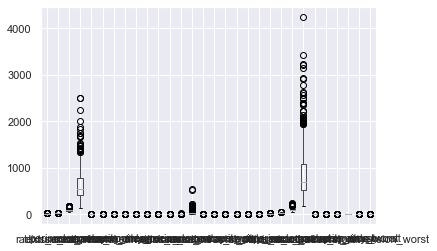

In [29]:
data[numeric_columns].boxplot()

from the boxplot above, the black circular points show the presence of lower and upper inner fence value in the variable
so lets replace the columns with fences with IQR

In [30]:
df_outliers.replace_outliers_with_iqr(numeric_columns)

In [31]:
df_outliers.getOverview()

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
radius_mean,11.70,13.37,15.78,4.08,0.66,0,0.0%,6.98,21.90,14.06,5.58,21.90
texture_mean,16.17,18.84,21.80,5.63,0.45,0,0.0%,9.71,30.24,19.25,7.73,30.24
perimeter_mean,75.17,86.24,104.10,28.93,0.70,0,0.0%,43.79,147.49,91.54,31.78,147.49
area_mean,420.30,551.10,782.70,362.40,0.92,0,0.0%,143.50,1326.30,639.77,-123.30,1326.30
smoothness_mean,0.09,0.10,0.11,0.02,0.26,0,0.0%,0.06,0.13,0.10,0.06,0.13
compactness_mean,0.06,0.09,0.13,0.07,0.83,0,0.0%,0.02,0.23,0.10,-0.03,0.23
concavity_mean,0.03,0.06,0.13,0.10,1.02,0,0.0%,0.00,0.28,0.09,-0.12,0.28
concave points_mean,0.02,0.03,0.07,0.05,1.00,0,0.0%,0.00,0.15,0.05,-0.06,0.15
symmetry_mean,0.16,0.18,0.20,0.03,0.40,0,0.0%,0.11,0.25,0.18,0.11,0.25


In [32]:

clean_df = df_outliers.df

<AxesSubplot:>

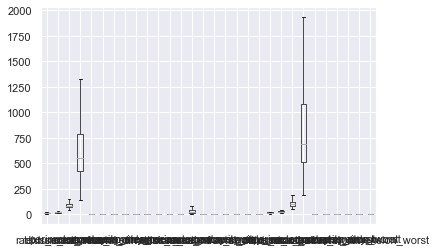

In [33]:
clean_df[numeric_columns].boxplot()

In [34]:
clean_df.head(20)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.00,0.12,0.23,0.28,0.15,0.24,0.08,0.85,0.91,5.98,86.20,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,1937.05,0.16,0.63,0.71,0.27,0.42,0.12
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1937.05,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,86.20,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.13,0.23,0.24,0.11,0.25,0.08,0.50,1.16,3.44,27.23,0.01,0.06,0.06,0.02,0.04,0.01,14.91,26.50,98.87,567.70,0.19,0.63,0.69,0.26,0.42,0.12
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,86.20,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
5,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,0.21,0.08,0.33,0.89,2.22,27.19,0.01,0.03,0.04,0.01,0.02,0.01,15.47,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12
6,18.25,19.98,119.60,1040.00,0.09,0.11,0.11,0.07,0.18,0.06,0.45,0.77,3.18,53.91,0.00,0.01,0.02,0.01,0.01,0.00,22.88,27.66,153.20,1606.00,0.14,0.26,0.38,0.19,0.31,0.08
7,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,0.22,0.07,0.58,1.38,3.86,50.96,0.01,0.03,0.02,0.01,0.01,0.01,17.06,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12
8,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,0.23,0.07,0.31,1.00,2.41,24.32,0.01,0.04,0.04,0.01,0.02,0.00,15.49,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.42,0.11
9,12.46,24.04,83.97,475.90,0.12,0.23,0.23,0.09,0.20,0.08,0.30,1.60,2.04,23.94,0.01,0.06,0.08,0.01,0.02,0.01,15.09,40.68,97.65,711.40,0.19,0.63,0.79,0.22,0.42,0.12


In [35]:
file_helper.to_csv(clean_df,'../data/clean_data.csv')

In [36]:
from overview import OverView

### Univariate Analysis
### Graphical Univariate Analysis

In [37]:
diagnosis_df = OverView.filter_by_count(data,"diagnosis").head()
diagnosis_df

,diagnosis,count
0,B,357
1,M,212


Number of Benign is 357
Number of Malignant is 212

In [38]:
fig = px.pie(diagnosis_df, values='count', names="diagnosis", title=f'Distribution of {"Diagnosis"}s', width=800, height=500)
fig.show()

let us see the variance, standart deviation, number of sample (count) or max min values in our data set.

In [39]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


## Visualization

Before visualization we need to normalize or standardize. Because differences between values of features are very high to observe on plot. 

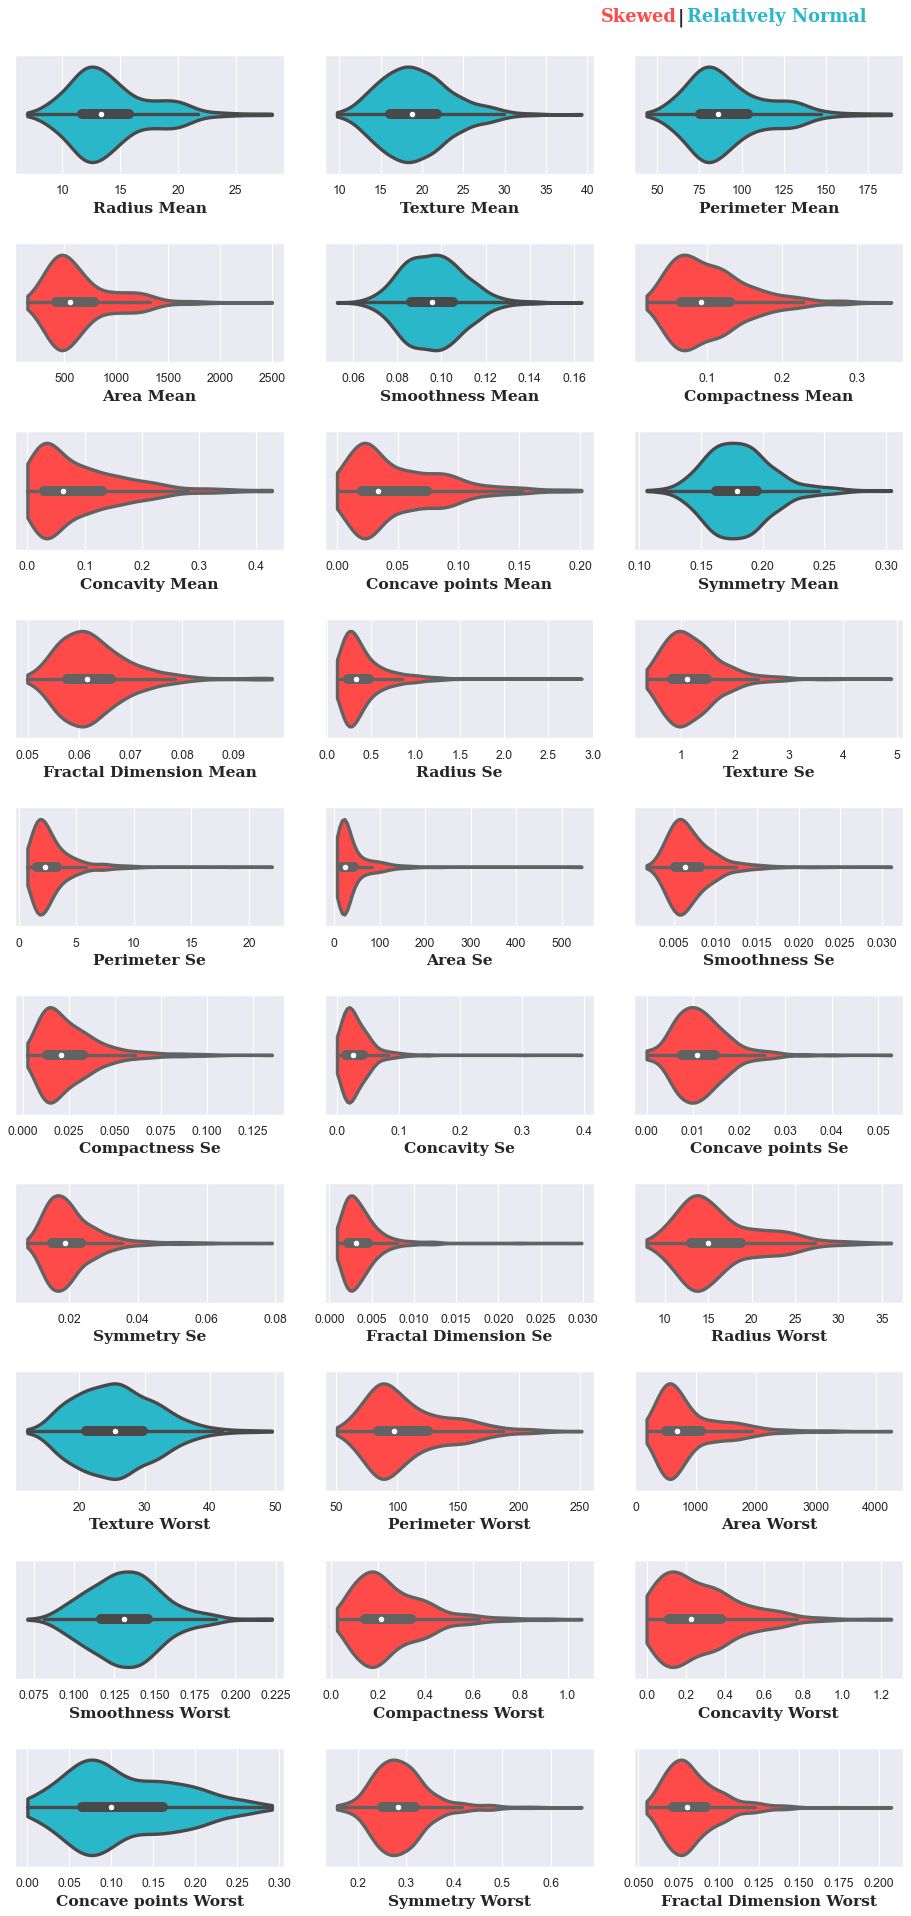

In [40]:
colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    # skewness
    if skew(x[col])>1:
        color = colors[0]
    else:
        color = colors[1]

    ## plots
    sns.violinplot(x[col], ax =ax,
                   color = color, cut =0,
                   inner = 'box',
                   alpha = 1,linewidth = 3, edgecolor = 'solidblack', saturation =1 )

    ## plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':14, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 3,h_pad = 2.5, w_pad = 2.5)

fig.text(0.65,1, "Skewed",{'font':'serif','size':16, 'weight':'bold', 'color':colors[0]})
fig.text(0.73,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.74,1, "Relatively Normal",{'font':'serif','size':16, 'weight':'bold','color':colors[1]})

fig.show()


## Bivariate Analysis

### Diagnosis vs Other features

In [41]:
normal_x = scale_norm.custome_normalizer(x)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

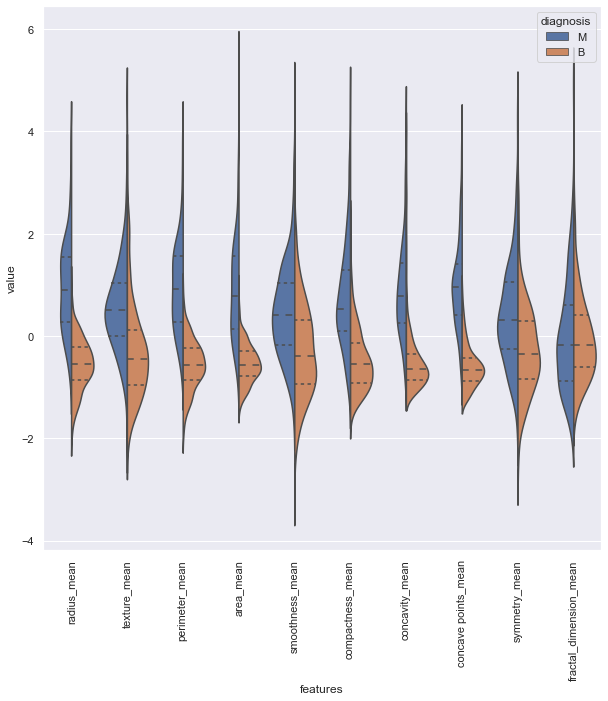

In [42]:
# first ten features
data_dia = y
data = x            
data = pd.concat([y,normal_x.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

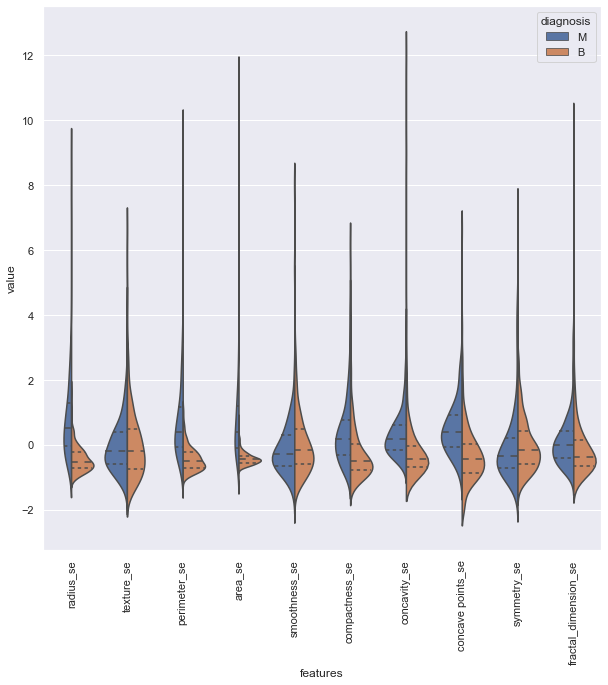

In [43]:
# Second ten features
data = pd.concat([y,normal_x.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

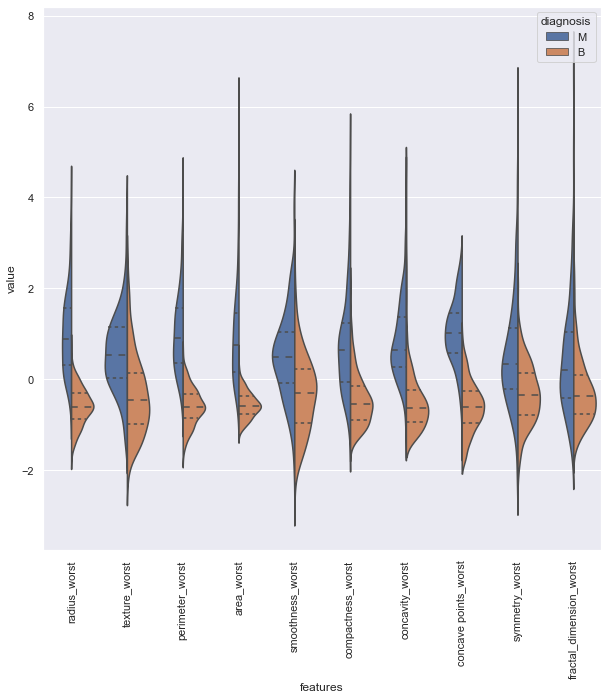

In [44]:
# Second ten features
data = pd.concat([y,normal_x.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

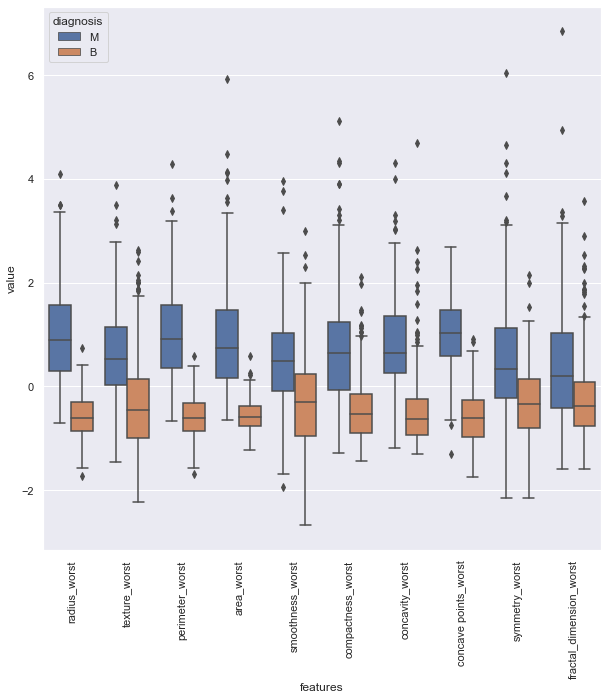

In [45]:
# visualizing using boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

From the above plot, variable of concavity_worst and concave point_worst looks like similar. (Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated.

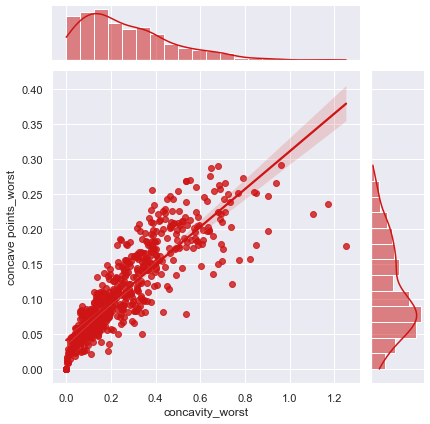

In [46]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

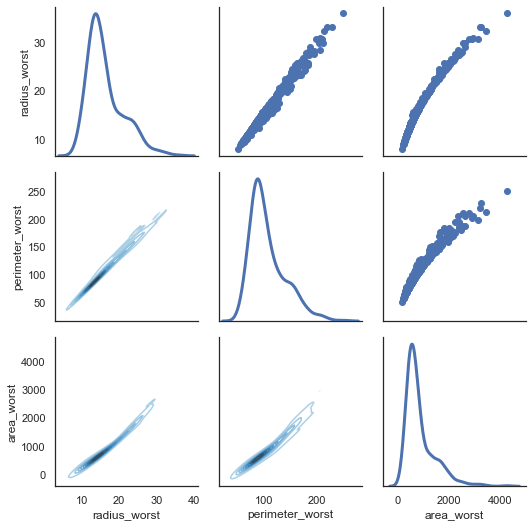

In [47]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [48]:
import time

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

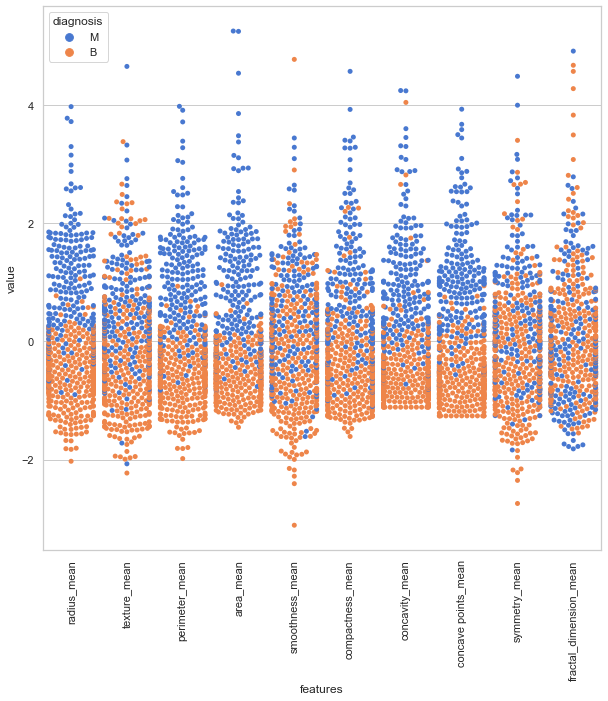

In [50]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,normal_x.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

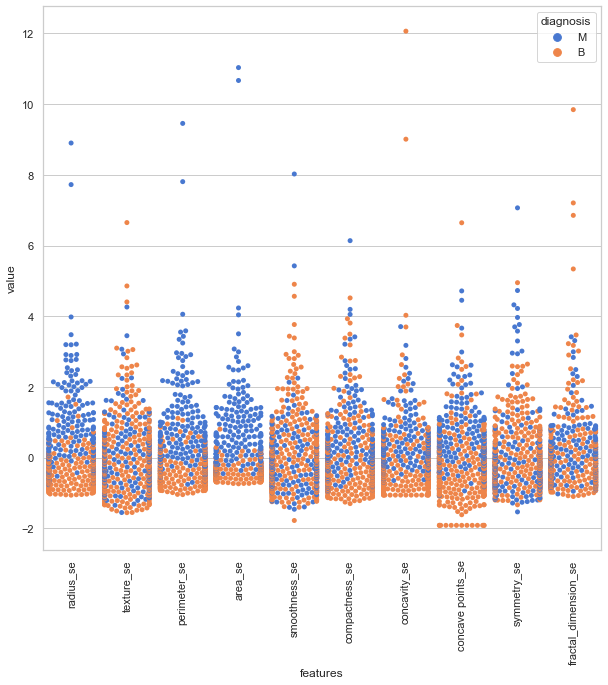

In [52]:
data = pd.concat([y,normal_x.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  74.12533283233643  s


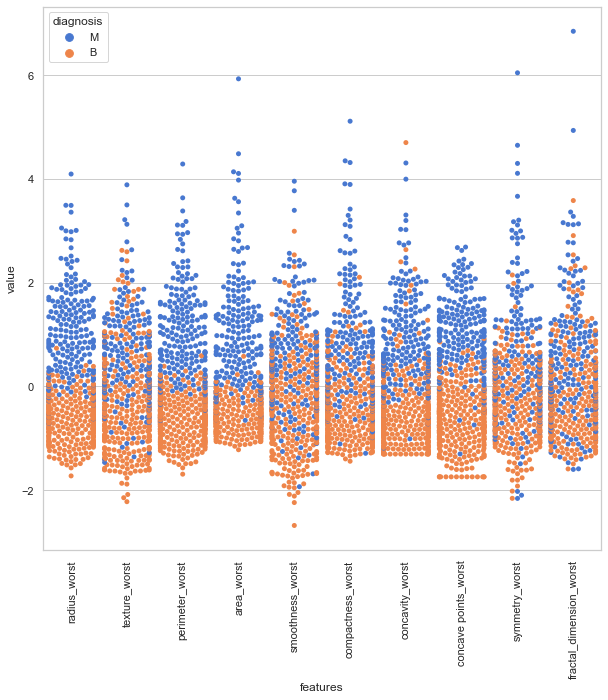

In [53]:
data = pd.concat([y,normal_x.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

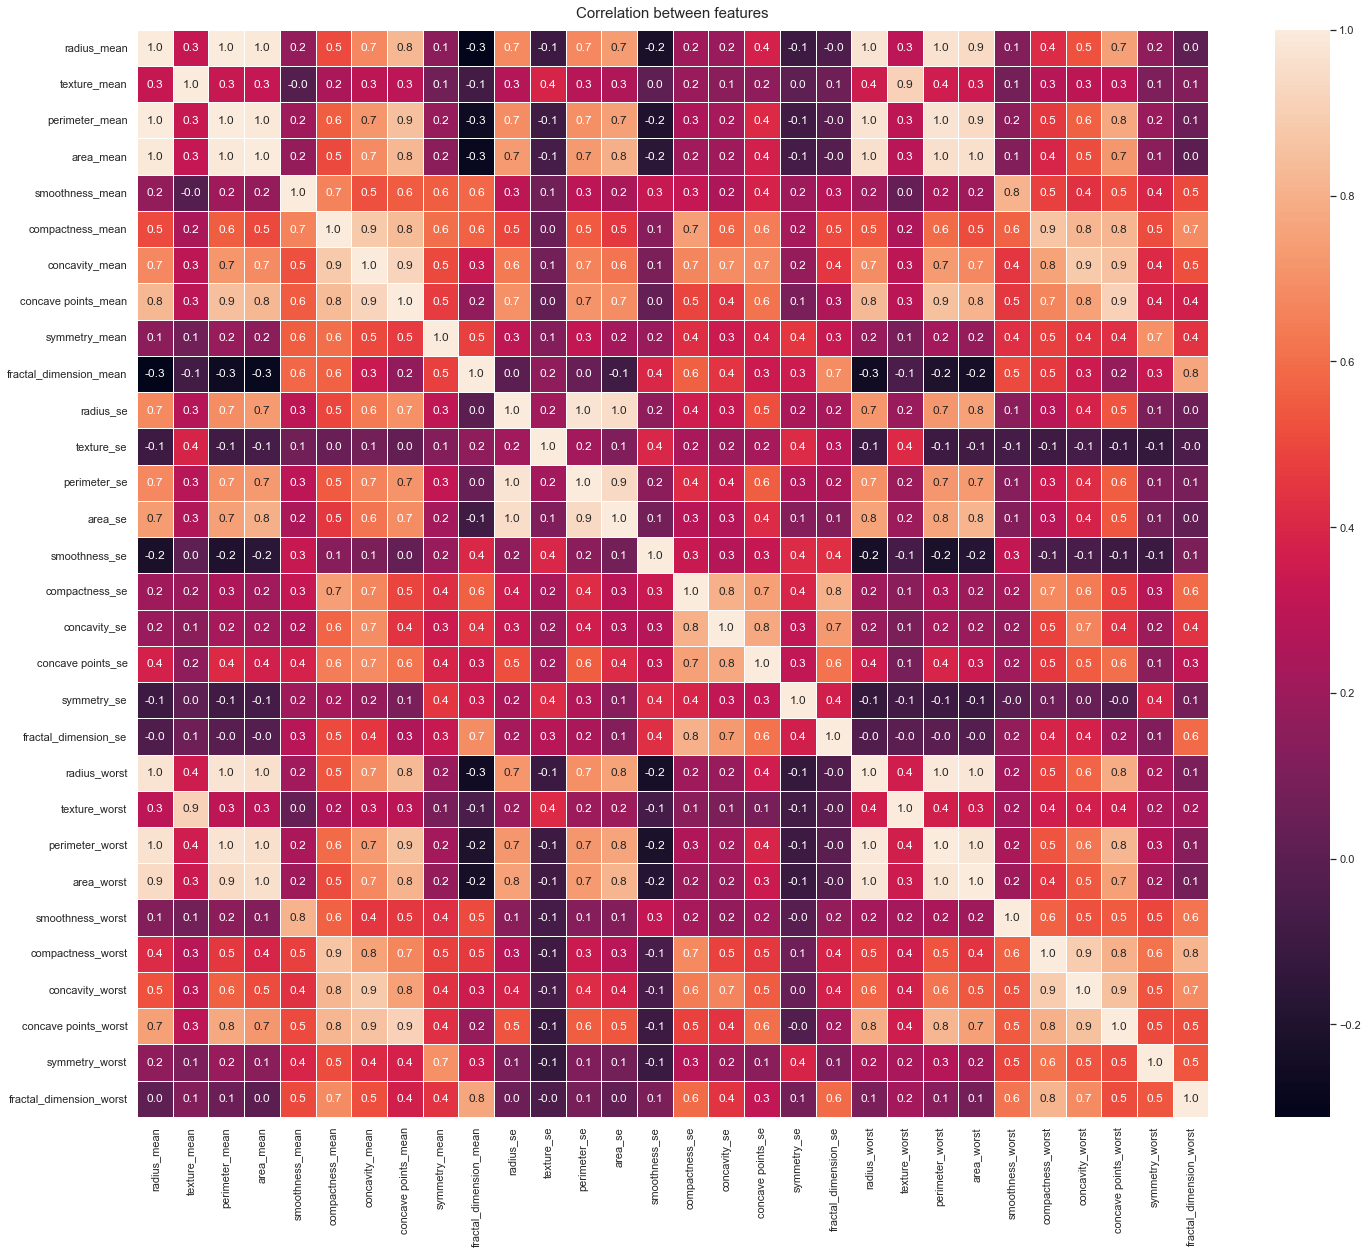

In [54]:
vs.plot_correlation(x)

## Feature Selection

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other. since area_mean from the swarm plots figure looks clear, I will use only area_mean. But we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.
Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [55]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.00,0.12,0.30,0.24,0.08,0.91,153.40,0.01,0.05,0.03,0.01,0.16,0.71,0.46,0.12
1,17.77,1326.00,0.08,0.09,0.18,0.06,0.73,74.08,0.01,0.02,0.01,0.00,0.12,0.24,0.28,0.09
2,21.25,1203.00,0.11,0.20,0.21,0.06,0.79,94.03,0.01,0.04,0.02,0.00,0.14,0.45,0.36,0.09
3,20.38,386.10,0.14,0.24,0.26,0.10,1.16,27.23,0.01,0.06,0.06,0.01,0.21,0.69,0.66,0.17
4,14.34,1297.00,0.10,0.20,0.18,0.06,0.78,94.44,0.01,0.06,0.02,0.01,0.14,0.40,0.24,0.08


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

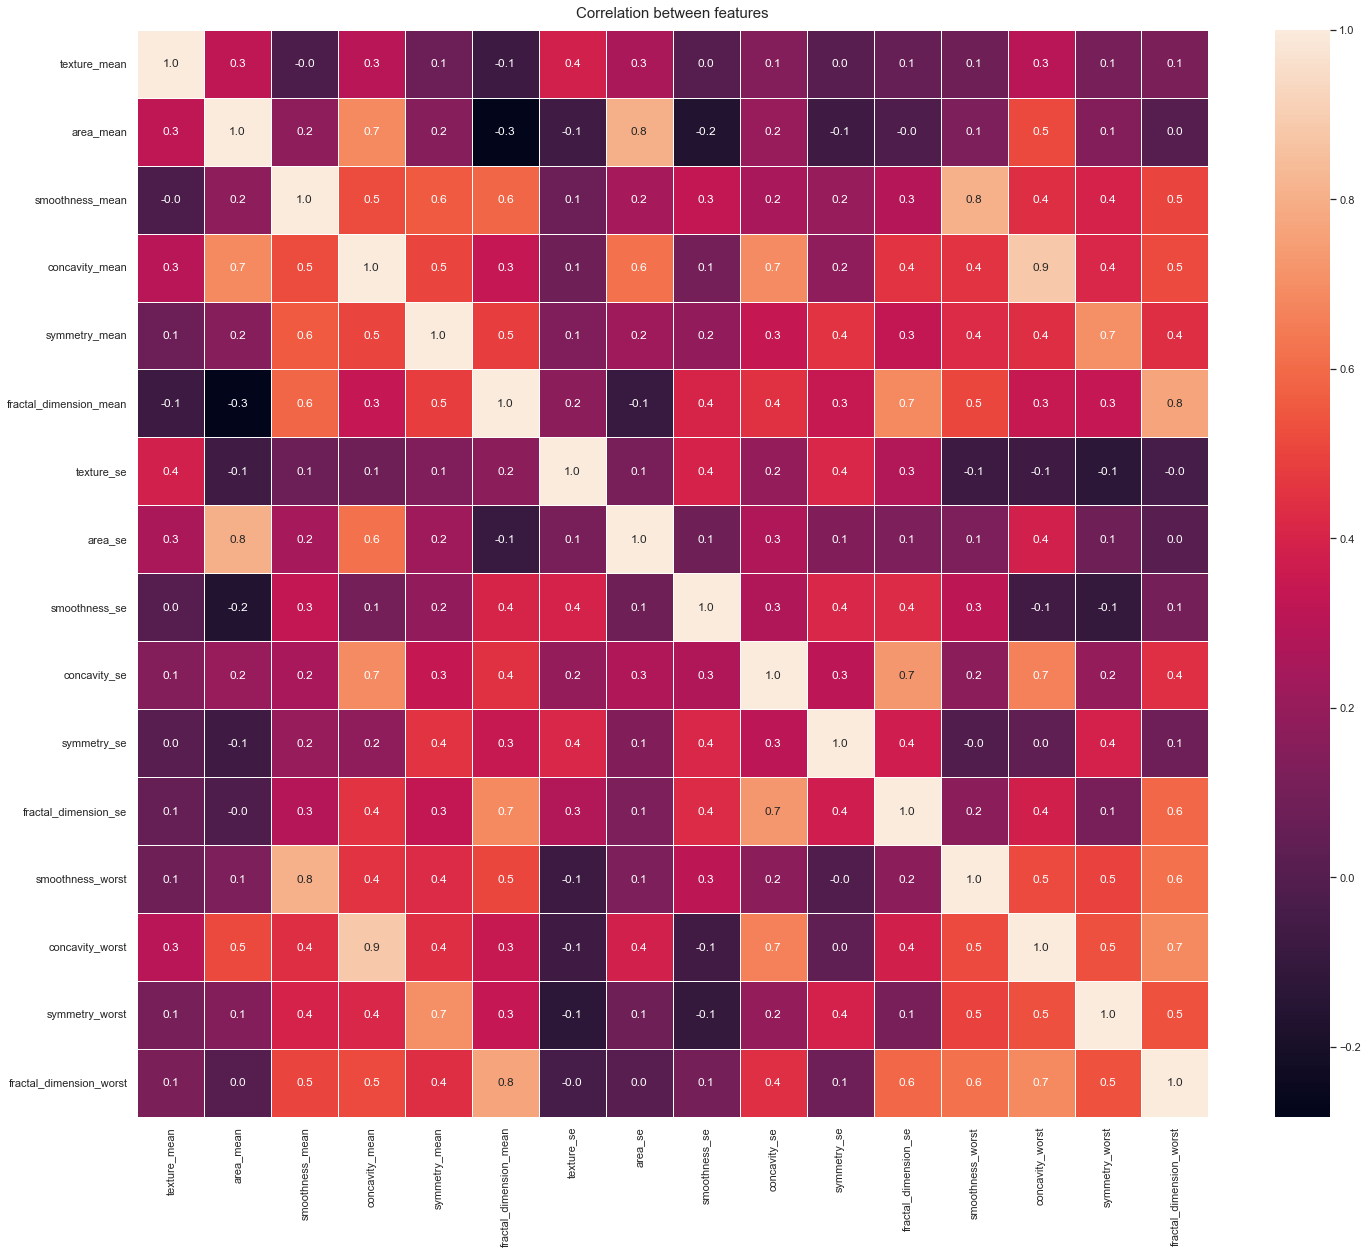

In [56]:
vs.plot_correlation(x_1)

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(normal_x,y,test_size=0.3,random_state=42)

In [58]:
print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 398
X_test 171
y_train 398
y_test 171


## Logistic regression model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 98.74
Testing Accuracy: % 98.25


### LightGBM with grid search

In [64]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

LightGBM=LGBMClassifier()

hiperparams={'max_depth': np.arange(2,10,2),
             'learning_rate': [0.0001,0.001,0.01,0.1,1],
             'n_estimators': np.arange(200,1000,200)}

model_cv=GridSearchCV(LightGBM,hiperparams,cv=5,n_jobs=-1).fit(x_train,y_train)
print(model_cv.best_params_)

# Model tunnnig
model_tunned=LGBMClassifier(learning_rate=model_cv.best_params_['learning_rate'],
                           n_estimators=model_cv.best_params_['n_estimators'],
                           max_depth=model_cv.best_params_['max_depth']).fit(x_train,y_train)
                        

pred_tunned=model_tunned.predict(x_test)

print(f"LGBM accuracy with grid search : {accuracy_score(y_test,pred_tunned)}")
{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 200}

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 200}
LGBM accuracy with grid search : 0.9649122807017544


{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 200}